In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter

In [2]:
train = pd.read_csv('../input/train_v2.csv')
members = pd.read_csv('../input/members_v3.csv')
transactions = pd.read_csv('../input/transactions.csv')
print(train.shape)

(970960, 2)


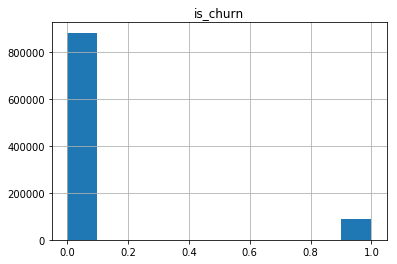

(970960, 2)


In [3]:
train.hist()
plt.show()
print(train.shape)

members.hist()
plt.show()

In [4]:
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])
training.head()
del train_v2
del members
print(training.shape)

(970960, 7)


In [5]:
training['city'] = training.city.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['registered_via'] = training.registered_via.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['gender']=training['gender'].fillna("NAN")
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      970960 non-null object
bd                        860967 non-null float64
gender                    970960 non-null object
registered_via            970960 non-null object
registration_init_time    860967 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 59.3+ MB


In [6]:
#PAS PERTINENT CAR IL Y A PLUS D'UNE TRANSACTION PAR MEMBERS ...
# training = pd.merge(left = training, right = transactions, how = 'left',on=['msno'])
# training.head()
# del transactions
# print(training.shape)

In [7]:
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28.0,male,3,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20.0,male,3,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18.0,male,3,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0.0,NAN,7,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35.0,female,7,20140125.0


In [8]:
training['registration_init_time'] = training.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )
# training['membership_expire_date'] = training.membership_expire_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN")
# training['transaction_date'] = training.transaction_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN")
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28.0,male,3,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20.0,male,3,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18.0,male,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0.0,NAN,7,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35.0,female,7,2014-01-25
